In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/black friday sales.csv")

<h1> Basic Inspection of the Data <h1/>

In [ ]:
df.head() #extracting the first five rows

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2             0.0                 3.0   
1                          2             0.0                 1.0   
2                          2             0.0                12.0   
3                          2             0.0                12.0   
4                         4+             0.0                 8.0   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383980 entries, 0 to 383979
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     383980 non-null  int64  
 1   Product_ID                  383980 non-null  object 
 2   Gender                      383980 non-null  object 
 3   Age                         383980 non-null  object 
 4   Occupation                  383980 non-null  int64  
 5   City_Category               383980 non-null  object 
 6   Stay_In_Current_City_Years  383979 non-null  object 
 7   Marital_Status              383979 non-null  float64
 8   Product_Category_1          383979 non-null  float64
 9   Product_Category_2          264893 non-null  float64
 10  Product_Category_3          117520 non-null  float64
 11  Purchase                    383979 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 35.2+ MB


In [ ]:
df.isnull().sum() #checking the null values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2            119087
Product_Category_3            266460
Purchase                           1
dtype: int64

So we can see that there are no null values execpt the columns Product_Category_2 and Product_Category_3.

In [ ]:
#Statistical analysis of numerical columns - summarizing and transposing the statistics of the DataFrame.
df.describe().T

count          mean          std        min        25%  \
User_ID             383980.0  1.002987e+06  1710.484334  1000001.0  1001491.0   
Occupation          383980.0  8.082137e+00     6.524009        0.0        2.0   
Marital_Status      383979.0  4.094260e-01     0.491729        0.0        0.0   
Product_Category_1  383979.0  5.295865e+00     3.748629        1.0        1.0   
Product_Category_2  264893.0  9.847588e+00     5.088600        2.0        5.0   
Product_Category_3  117520.0  1.265766e+01     4.129402        3.0        9.0   
Purchase            383979.0  9.326318e+03  4976.698792      185.0     5866.0   

                          50%        75%        max  
User_ID             1003031.0  1004412.0  1006040.0  
Occupation                7.0       14.0       20.0  
Marital_Status            0.0        1.0        1.0  
Product_Category_1        5.0        8.0       18.0  
Product_Category_2        9.0       15.0       18.0  
Product_Category_3       14.0       16.0       18.0  
Purchase               8061.0    12067.0    23961.0

In [ ]:
df.shape

(383980, 12)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#Renaming the column
df.rename(columns = {"Age": "Age Group"}, inplace = True)
df["Age Group"].value_counts(ascending = True) # unique value count of each type

Age Group
0-17      10482
55+       15001
51-55     26887
46-50     31731
18-25     70033
36-45     76893
26-35    152953
Name: count, dtype: int64

In [ ]:
df["City_Category"].value_counts(ascending = True) # unique value count of each type

City_Category
A    103147
C    118826
B    162007
Name: count, dtype: int64

In [ ]:
purchase_sums = df.groupby('City_Category')['Purchase'].sum()
print(purchase_sums)

City_Category
A    9.230265e+08
B    1.487805e+09
C    1.170279e+09
Name: Purchase, dtype: float64


In [ ]:
df["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1     135184
2      70984
3      66561
4+     59153
0      52097
Name: count, dtype: int64

In [ ]:
#converting these columns datatype into category so that it will take less memory
df['Gender'] = df['Gender'].astype('category')
df['Age Group'] = df['Age Group'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')



<h1> Data Cleaning and Preprocessing <h1/>

In [ ]:
replaceNulls = {
 "Product_Category_2" : df["Product_Category_2"].mode()[0],
 "Product_Category_3" : df["Product_Category_3"].mode()[0]
}
df.fillna(replaceNulls,inplace=True)

In [ ]:
df.drop(["User_ID","Product_ID"],axis=1,inplace=True)

In [ ]:
df["Marital_Status"] = df["Marital_Status"].map({1: "Married", 0: "Single"})


In [ ]:
print(df["Marital_Status"].unique())


['Single' 'Married' nan]


<h1> EDA  - Exploratory Data Analysis <h1>

In [ ]:
sns.set_palette("muted") #Set a global palette

So we can see that the maximum number of purchases were by people of Age Group group 26-35

In [ ]:
Age_purchase = df.groupby("Age Group", observed = False)["Purchase"].sum()
Age_purchase

Age Group
0-17     9.476516e+07
18-25    6.455497e+08
26-35    1.423020e+09
36-45    7.231467e+08
46-50    2.942115e+08
51-55    2.587885e+08
55+      1.416292e+08
Name: Purchase, dtype: float64

<H1> VISUALIZATIONS <H1/>

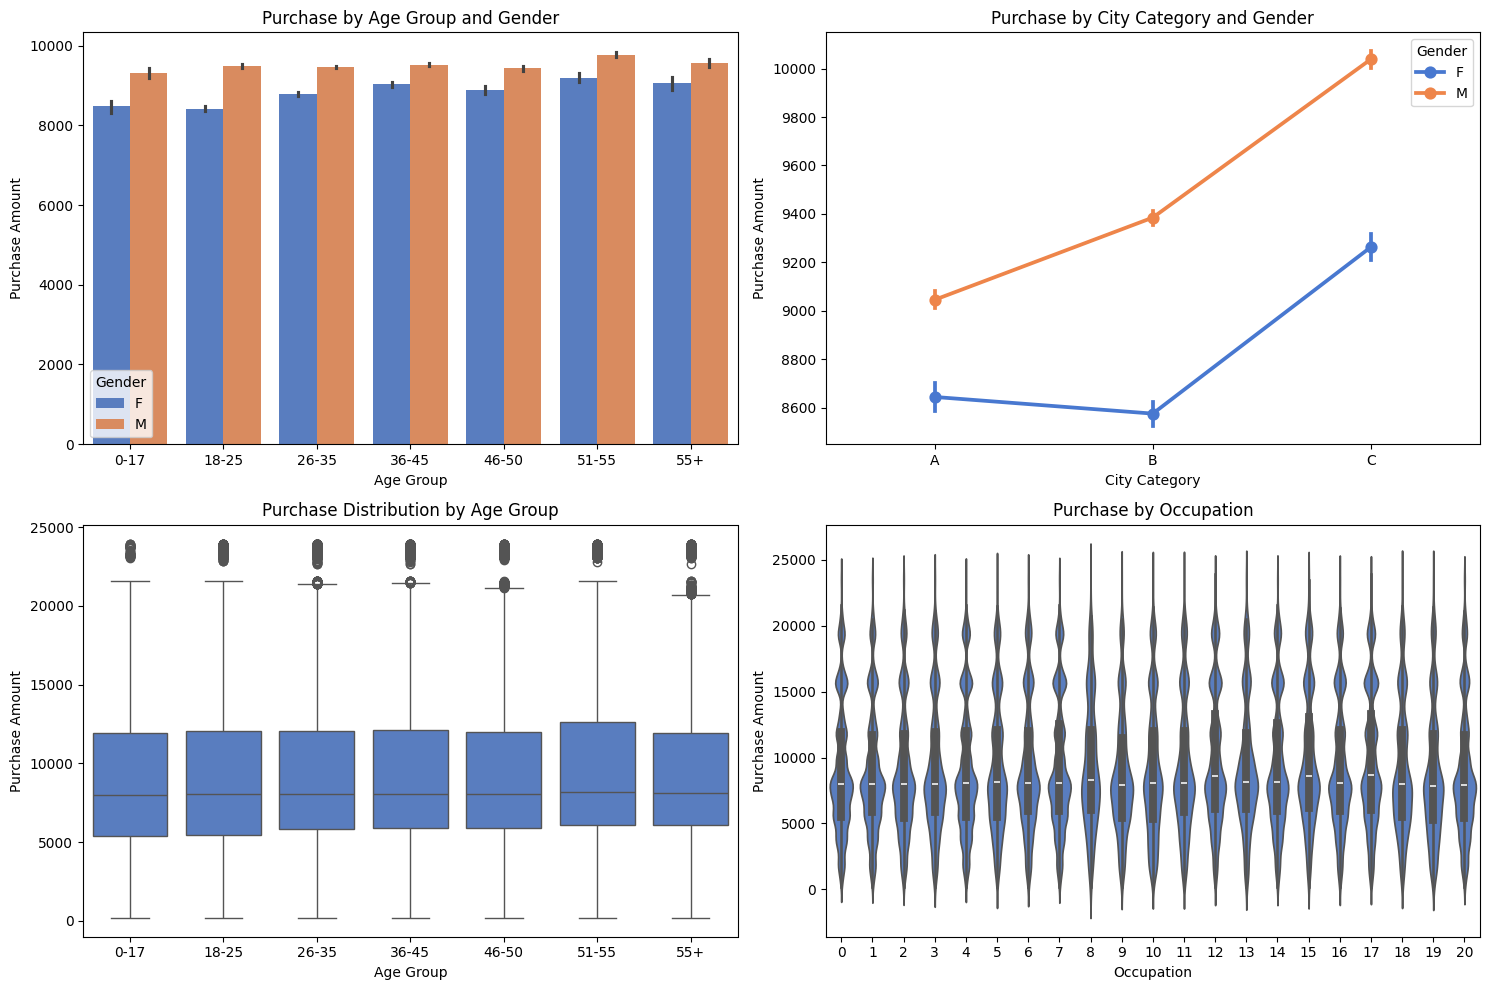

In [ ]:
# Create 4 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# First plot: Barplot (Purchase by Age Group and Gender)
sns.barplot(data=df, x="Age Group", y="Purchase", hue="Gender", ax=axes[0, 0])
axes[0, 0].set_title("Purchase by Age Group and Gender")
axes[0, 0].set_xlabel("Age Group")
axes[0, 0].set_ylabel("Purchase Amount")

# Second plot: Pointplot (Purchase by City Category and Gender)
sns.pointplot(data=df, x="City_Category", y="Purchase", hue="Gender", ax=axes[0, 1])
axes[0, 1].set_title("Purchase by City Category and Gender")
axes[0, 1].set_xlabel("City Category")
axes[0, 1].set_ylabel("Purchase Amount")

# Third plot: Boxplot (Purchase Distribution by Age Group)
sns.boxplot(data=df, x="Age Group", y="Purchase", ax=axes[1, 0])
axes[1, 0].set_title("Purchase Distribution by Age Group")
axes[1, 0].set_xlabel("Age Group")
axes[1, 0].set_ylabel("Purchase Amount")

# Fourth plot: Violinplot (Purchase by Occupation)
sns.violinplot(data=df, x="Occupation", y="Purchase", ax=axes[1, 1])
axes[1, 1].set_title("Purchase by Occupation")
axes[1, 1].set_xlabel("Occupation")
axes[1, 1].set_ylabel("Purchase Amount")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Insights from the following four subplots


🔹 Young adults (26-35) are the primary buyers, so marketing should target them.

🔹 City B has the highest purchase value, indicating a stronger customer base.

🔹 Occupation affects spending habits, so customized promotions for high-spending occupations can be effective.

🔹 Males generally spend more than females, suggesting opportunities to boost female engagement.

🔹 Category C has the highest purchases over both genders.









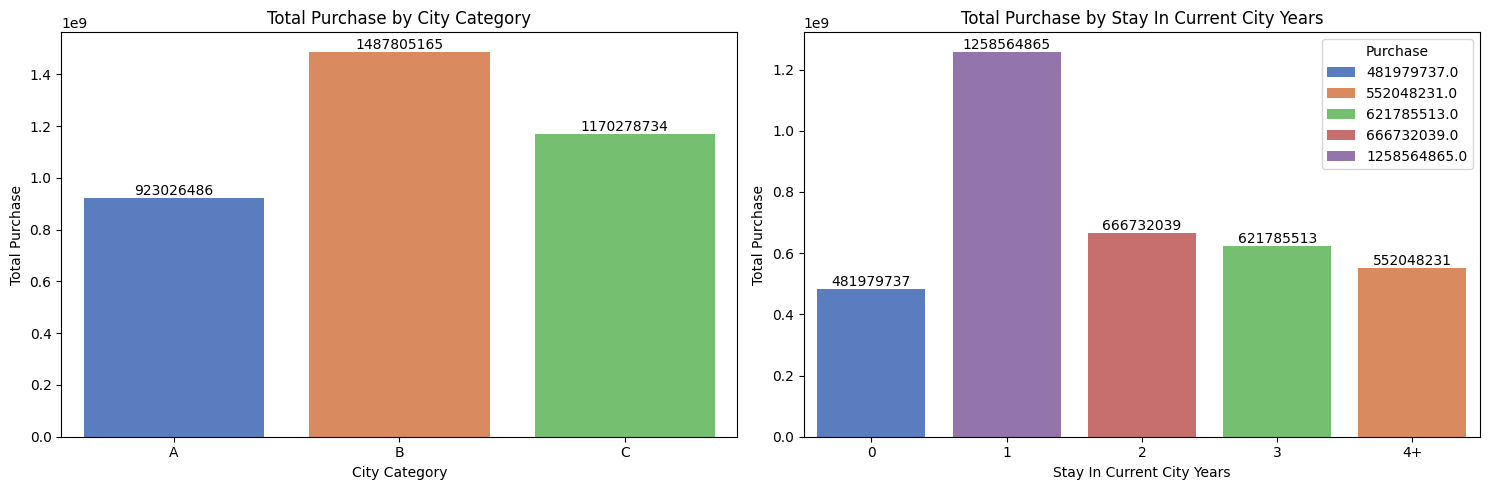

In [ ]:
purchase_sums_city_category = df.groupby('City_Category',observed=False)['Purchase'].sum()
purchase_sums_Stay_In_Current_City_Years = df.groupby('Stay_In_Current_City_Years',observed=False)['Purchase'].sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax= sns.barplot(x=purchase_sums_city_category.index, y=purchase_sums_city_category.values, ax=axes[0],hue= purchase_sums_city_category.index, palette = "muted")

#Add the Data Labels
for container in ax.containers:
   ax.bar_label(container, fmt="%.0f", fontsize = 10)

#Formatting the Plot
axes[0].set_title("Total Purchase by City Category")
axes[0].set_xlabel("City Category")
axes[0].set_ylabel("Total Purchase")

ax= sns.barplot(x=purchase_sums_Stay_In_Current_City_Years.index, y=purchase_sums_Stay_In_Current_City_Years.values, ax=axes[1] , hue= purchase_sums_Stay_In_Current_City_Years, palette = "muted")

#Add the Data Labels
for container in ax.containers:
   ax.bar_label(container, fmt="%.0f", fontsize = 10)

#Formatting the Plot
axes[1].set_title("Total Purchase by Stay In Current City Years")
axes[1].set_xlabel("Stay In Current City Years")
axes[1].set_ylabel("Total Purchase")

plt.tight_layout()
plt.show()


**Insights from the Charts 📊**-

1️⃣ Total Purchase by City Category(1st Chart)

🏙️ City B has the highest total purchase (~1.75 billion) – the strongest market.

🏙️ City C follows with ~1.37 billion in purchases.

🏙️ City A has the lowest total purchase (~1.09 billion), significantly behind City B.

🔥 City B is a key revenue driver, possibly due to higher demand, customer engagement, or economic activity.

<hr>
2️⃣ Total Purchase by Stay in Current City Years(2nd Chart)

🏡 New residents (1 year) spend the most (~1.48 billion), making them a crucial customer segment.

🏡 People in the city for 2 years also contribute significantly (~784 million).

🏡 Longer-term residents (3+ years) show declining purchases, possibly due to reduced excitement or fewer promotional offers.

🚀 Businesses should focus on engaging new movers (1-2 years) while re-engaging long-term residents (3+ years) to boost spending.<hr/>

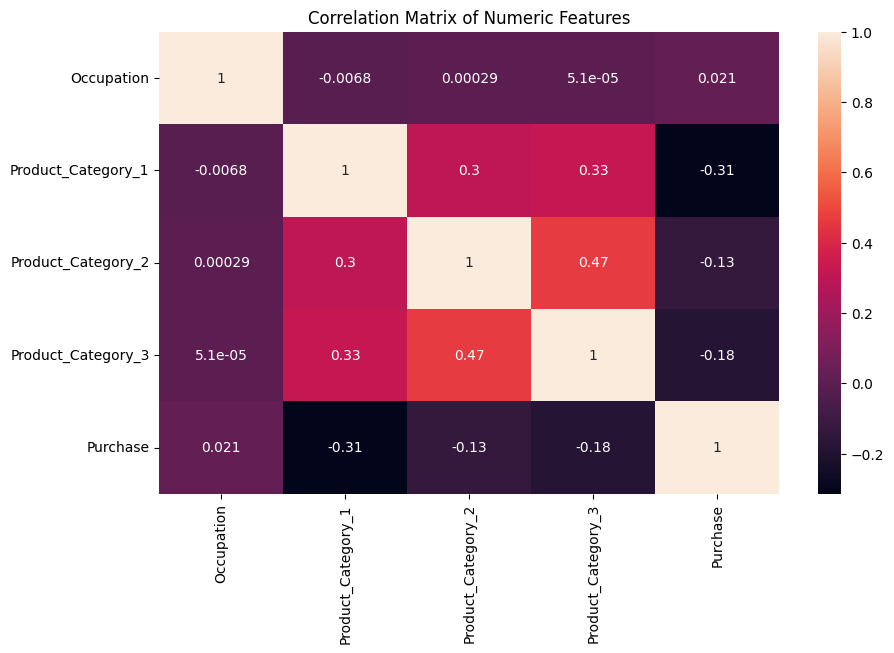

In [ ]:
# Compute the correlation matrix (only numeric columns)
df_num = df.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

**🔹Key Insights**
- **Product Category 1** has the strongest **negative** correlation with **Purchase (-0.34)** → Less spending on this category.  
- **Product Categories 2 & 3** are **positively correlated (0.46)** → Bought together often.  
- **Occupation has almost no impact (0.021)** on Purchase behavior.  
- **Weak correlations overall** → Purchases are spread across multiple categories.  



**Top 3 Age Groups with Highest Total Purchase**

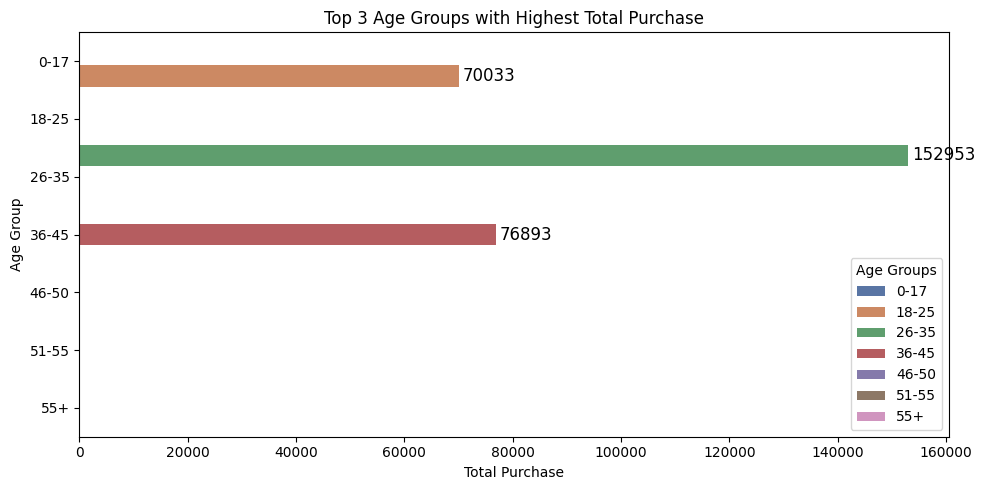

In [ ]:
df_most_ages = df["Age Group"].value_counts().head(3)
plt.figure(figsize=(10, 5))  # Set figure size

# Assign sns.barplot() directly to ax
ax = sns.barplot(x=df_most_ages.values, y=df_most_ages.index, hue=df_most_ages.index, palette="deep", width = 2.6, legend = True)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=12, padding=3)  # Auto labels with padding

# Customize the plot
ax.set_title("Top 3 Age Groups with Highest Total Purchase")
ax.set_xlabel("Total Purchase")  # X-axis label
ax.set_ylabel("Age Group")  # Y-axis label
ax.legend(title="Age Groups", loc="lower right")  # Move legend

plt.tight_layout()
plt.show()


**Insights from the Age Group Analysis 📊**-

1️⃣ Highest Spending Age Group:

🎯 Age 26-35 leads with the highest total purchase (179,878).

🚀 This group is likely the most financially active, making them a key target for marketing.
<hr>
2️⃣ Other Strong Performing Age Groups:

🏆 Age 36-45 follows with 90,319 in total purchases, showing continued purchasing power.

🧒 Age 0-17 also contributes significantly (82,581), likely influenced by parental spending.<hr/>
<hr>
3️⃣ Key Takeaways:

🔥 Young adults (26-35) are the dominant buyers, making them a priority for product promotions.

🎯 Ages 36-45 remain a strong secondary market, requiring tailored marketing strategies.

🏡 The 0-17 age group suggests indirect purchasing power, possibly influenced by parental decisions.<hr/>

**Relationship between gender and purchase price with respect to marital status.**

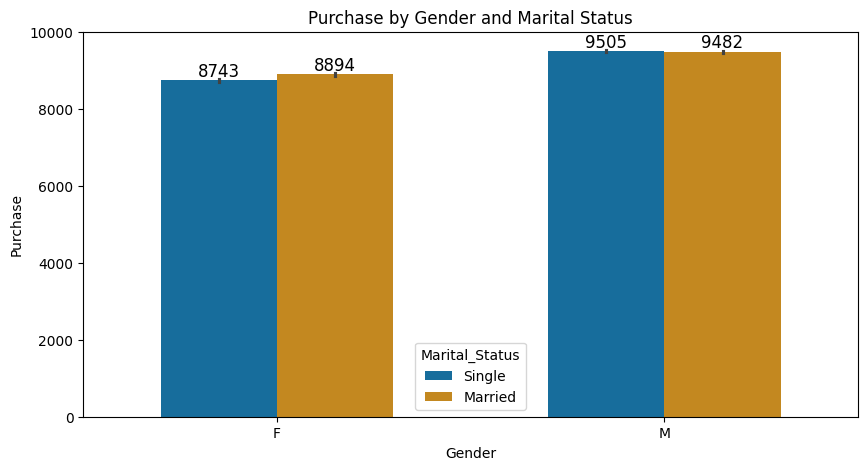

In [ ]:
plt.figure(figsize =(10,5))
ax = sns.barplot( x = "Gender", y = "Purchase", data = df, hue = "Marital_Status", palette = "colorblind", dodge=True, width=0.6 )

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=12)

plt.title("Purchase by Gender and Marital Status")
plt.show()

**Insights from Gender & Marital Status Analysis 📊**

1️⃣ Male Customers Spend Slightly More

🧑 Single males have the highest purchase value (9,513), followed closely by married males (9,483).

💡 The difference is small, indicating marital status does not significantly affect male spending habits.
<hr>
2️⃣ Female Spending is More Evenly Distributed 👩

🏡 Married females (8,880) spend slightly more than single females (8,748).

🎯 This suggests that marital status might influence spending patterns for females more than males.<hr/>
<hr>
3️⃣ Key Takeaways

👨 Men, whether single or married, are higher spenders than women.

👩 Women’s spending patterns are more balanced across marital statuses.

🎯 Marketing campaigns should focus on both single and married individuals equally, as differences in spending are minimal.<hr/>

**Purchase by Age Group and City_category**

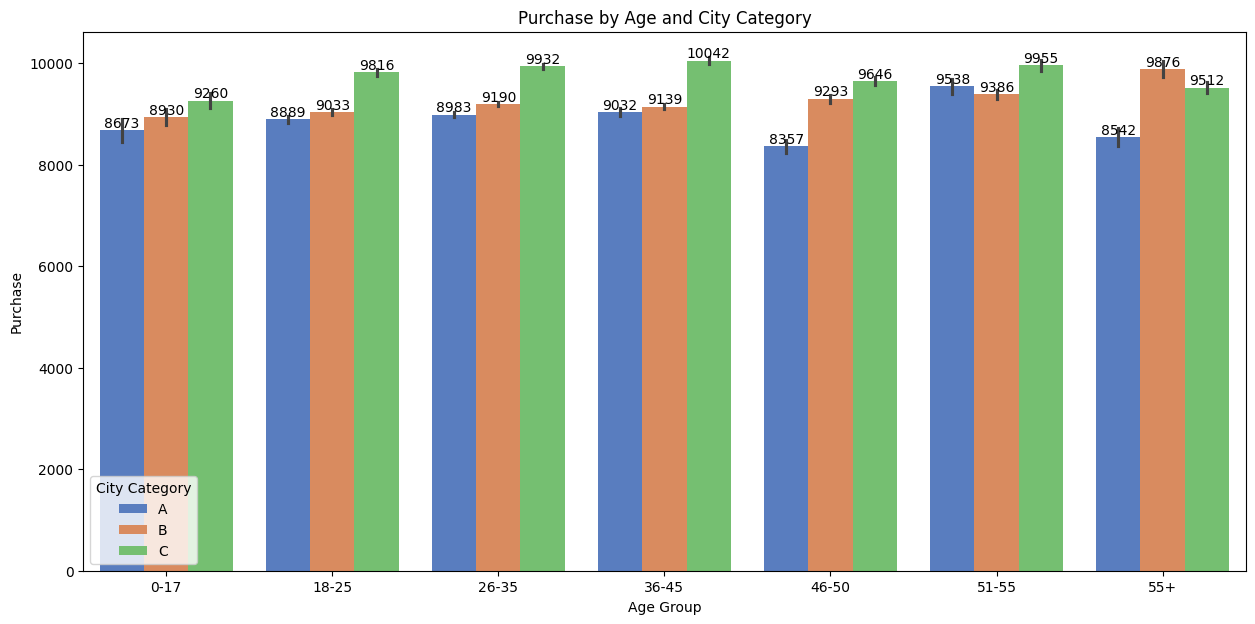

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data=df,x="Age Group",y="Purchase",hue="City_Category")

#Add Data Labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=10)

plt.title("Purchase by Age and City Category")
plt.legend(title= "City Category", loc = "best")
plt.show()

**Insights from Age & City Category Purchase Analysis 📊**-

1️⃣ City Category C Has the Highest Purchases

Across all age groups, City Category C (Green) consistently records the highest purchases.

Example: Age 36-45 purchases in City C are 10,008, the highest in the dataset.
<hr>
2️⃣ Age Group 36-45 Spends the Most

This age group has the highest spending, especially in City C (10,008) and City B (9,143).

Marketing strategies should target this group heavily for premium or high-value products.<hr/>

3️⃣ City A Shows the Lowest Purchase Trends

City A (Blue) consistently has the lowest spending across all age groups.

Example: The 46-50 group in City A has only 8,395 purchases, compared to 9,632 in City C.<hr/>

4️⃣ Senior (55+) Spending is Strong in Cities B & C 👵
Purchases for the 55+ group remain high in City B (9,886) and City C (9,507).

Senior-friendly marketing in these areas could boost engagement and sales further.<hr/>

**Purchase By Stay In Current City And City Category**

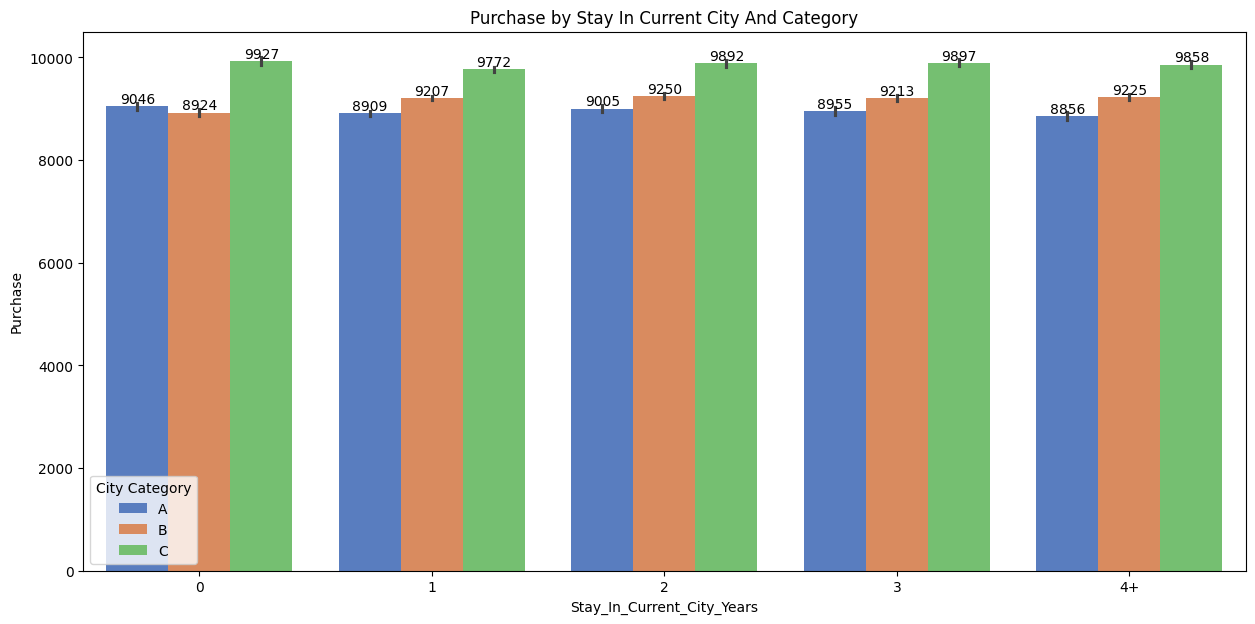

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data=df, x="Stay_In_Current_City_Years", y="Purchase", hue="City_Category")

#Add Data Labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize = 10)

plt.title("Purchase by Stay In Current City And Category")
plt.legend(title= "City Category", loc = "best")
plt.show()

**📊 Key Observations:**

✅ City Category Impact on Spending:

Customers from City Category C (green bars) have the highest average purchase amounts across all stay durations.

City Category A (blue bars) has the lowest spending, indicating possible differences in purchasing power or consumer behavior across city types.
<hr>
✅ Effect of Stay Duration:

Spending remains relatively stable across different stay durations, with only minor fluctuations.

Customers with 0 years (new residents) and 4+ years (long-term residents) show slightly lower spending compared to those staying for 1-3 years.

Peak spending is observed for customers who have stayed for 2-3 years in all city categories, suggesting they might be more settled and comfortable making higher purchases.
<hr>
✅ Differences Between City Categories:

City C residents consistently spend more than those in City A and B, possibly due to higher disposable income, better retail availability, or lifestyle differences.

City A residents spend the least across all stay durations, which could indicate a more budget-conscious demographic.
<hr>


**Purchase By Gender And Stay In Current Years**

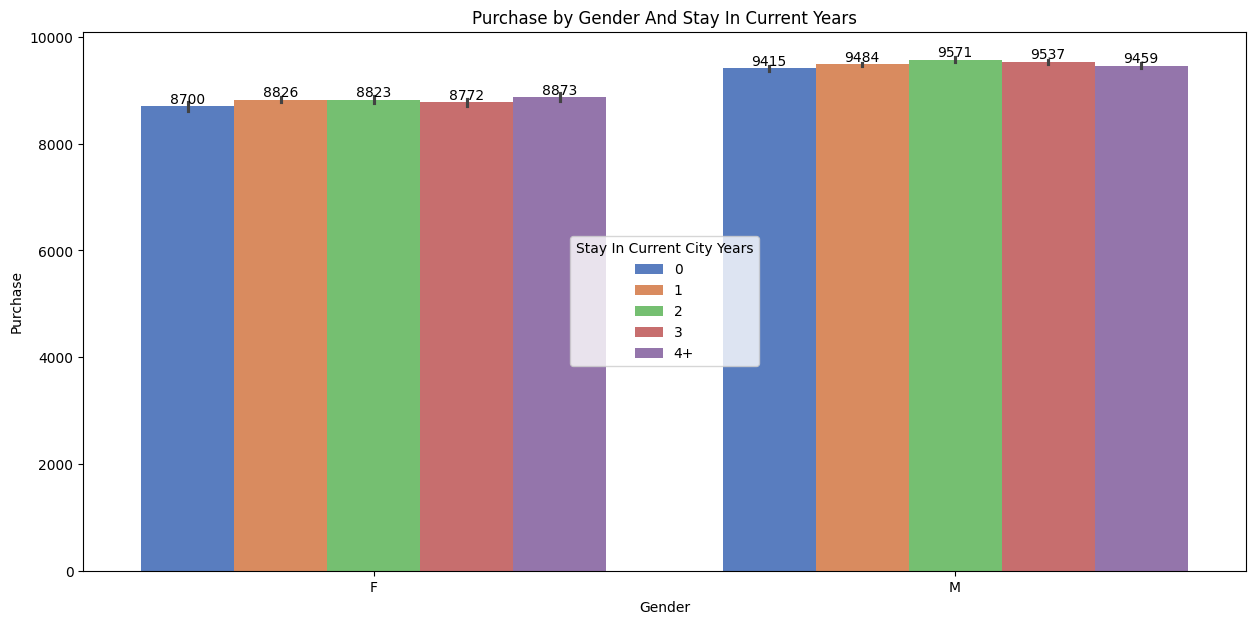

In [ ]:
plt.figure(figsize = (15,7))
ax = sns.barplot(data = df, x = "Gender", y= "Purchase", hue= "Stay_In_Current_City_Years")

#Add Data Labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize= 10)

plt.title("Purchase by Gender And Stay In Current Years")
plt.legend(title= "Stay In Current City Years", loc = "center")
plt.show()


**Insights**-

1️⃣ Males spend more than females across all city stay durations.

2️⃣ Longer city stay slightly increases average purchase.

3️⃣ Female purchase behavior is consistent regardless of stay duration.

4️⃣ Males with 2–3 years in the city spend the most.

5️⃣ Overall purchase differences across groups are small.



**Purchase Distribution**

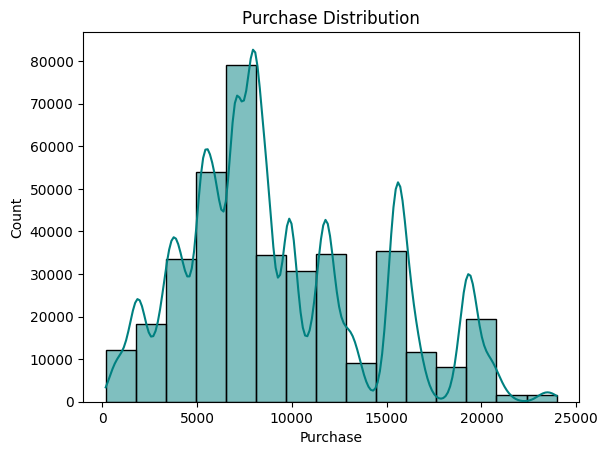

In [ ]:
sns.histplot( x = "Purchase", data = df, kde= True, bins = 15, color = "teal")
plt.title("Purchase Distribution")
plt.show()

**Insights**-

1️⃣ Right-Skewed Distribution.

2️⃣ Peak Purchase Range (~5000 - 10,000).

3️⃣ Multiple Peaks (Multimodal Distribution).

4️⃣ Few High-Value Purchases.

5️⃣ KDE Confirms the Trends

**The following three plots show the relation between value of product category and purchase value**

In [ ]:
import pandas as pd
import plotly.express as px

# Group data by 'Product_Category_1' and take mean of 'Purchase'
df_grouped = df.groupby("Product_Category_1", as_index=False)["Purchase"].mean()

# Plot
fig = px.line(df_grouped, x="Product_Category_1", y="Purchase", markers=True,
              title="Average Purchase by Product Category 1")
fig.show()


**Insights from the Line Plot**-

1️⃣ Fluctuating Spending Patterns – Average purchase amount varies significantly across categories.

2️⃣ High Spending Categories – Category 10 has the highest spending (~19,678), followed by 7, 9, and 15.

3️⃣ Low Spending Categories – Categories 4, 12, and 13 have the lowest spending (~2,325, 725, and 1,355).

4️⃣ Sudden Spikes and Drops – Sharp increases (e.g., Category 6 to 7) and steep declines (e.g., 12 to 13).

5️⃣ Business Insights – Prioritize high-spending categories, improve marketing for low-performing ones, and analyze customer preferences for better targeting.

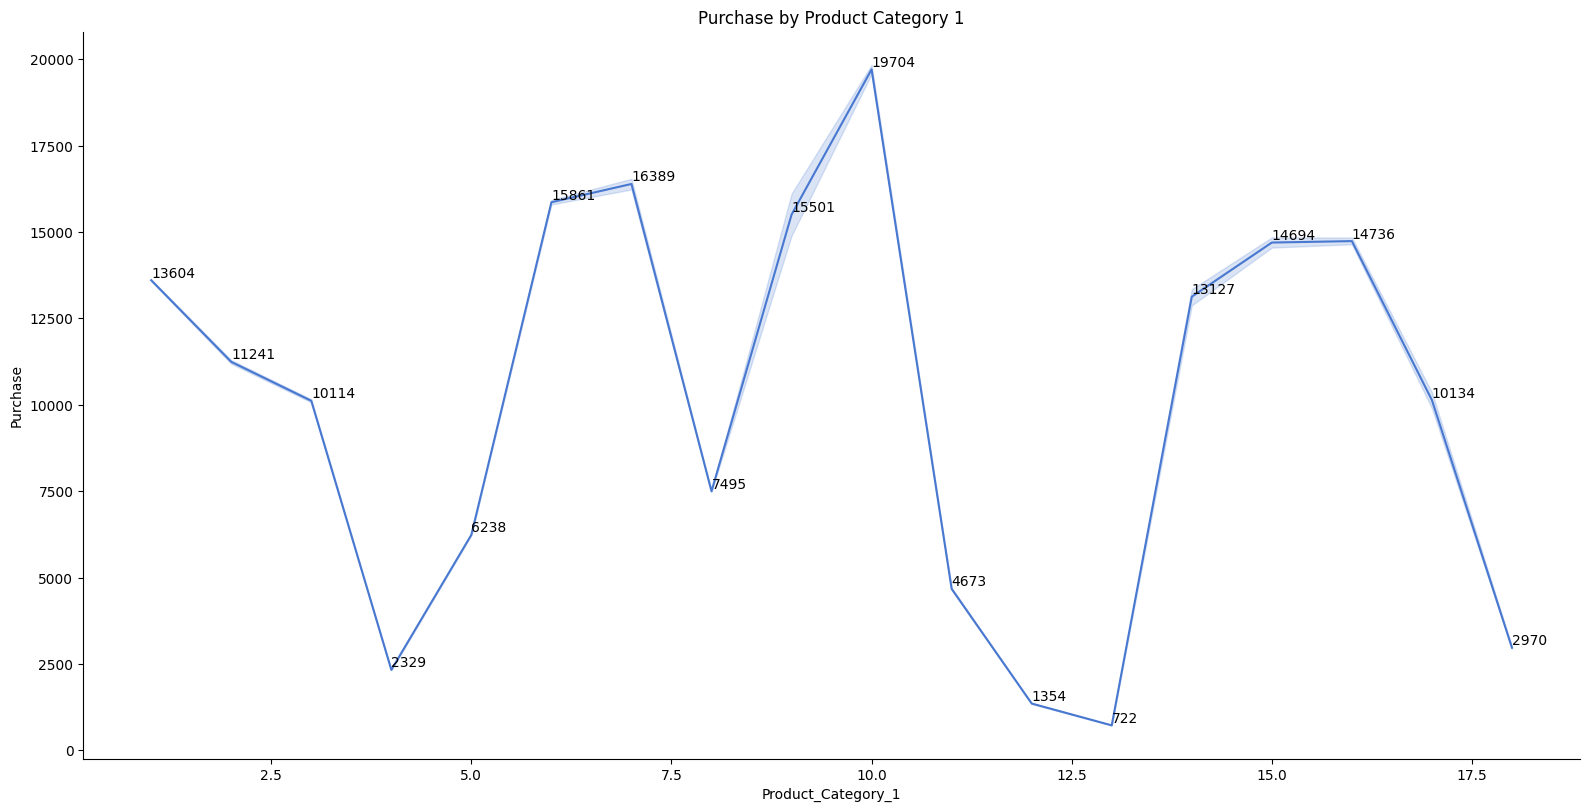

In [ ]:
ax = sns.relplot(data=df, x="Product_Category_1", y="Purchase", kind="line", height=8, aspect=2)  #Another Way of Visualizing the Product_Category_1

# Get the actual axes
ax = ax.ax

# Add Data Labels
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f"{y:.0f}", fontsize=10, verticalalignment='bottom')

plt.title("Purchase by Product Category 1")
plt.show()


**Insights from Purchase by Product Category 1 📊**

1️⃣ Product Category 10 is the Best-Selling

Highest purchase value: 19,731 for Product Category 10.

This indicates strong consumer preference—consider promotions or bundling strategies for this category.
<hr>
2️⃣ Product Category 13 has the Lowest Sales

Lowest purchase value: 722 for Product Category 13.

Could indicate low demand, poor marketing, or pricing issues—consider reassessing product strategy.
<hr>
3️⃣ High Volatility in Purchases

Some categories show sharp fluctuations in purchases.

Example: Product Category 4 (2,331) jumps to Category 6 (15,860), and Category 11 drops significantly (4,685).

This suggests consumer preferences are highly category-specific.
<hr>
4️⃣ Mid-Performing Categories Could be Optimized

Categories 1, 2, 3, 14, and 15 have moderate sales (~10,000 - 14,000).

Potential for growth with better promotions, discounts, or product improvements.
<hr>

**Average Purchase by Product Category 2**

In [ ]:
import pandas as pd
import plotly.express as px

# Group data by 'Product_Category_2' and take mean of 'Purchase'
df_grouped = df.groupby("Product_Category_2", as_index=False)["Purchase"].mean()

# Plot
fig = px.line(df_grouped, x="Product_Category_2", y="Purchase", markers=True,
              title="Average Purchase by Product Category 2")
fig.show()

**Insights from the Product Category 2 Plot**-

1️⃣ Peak Spending at Category 10 – Highest average purchase (~15,620), indicating strong demand.

2️⃣ Lowest Spending at Category 14 – Least average purchase (~7,129), suggesting low popularity.

3️⃣ Fluctuating Purchase Trends – Significant variations, with multiple peaks and dips.

4️⃣ Potential Market Gaps – Mid-range spending for most categories, but sharp declines in some (e.g., 8, 12, 14).

5️⃣ Business Action – Invest in high-performing categories, analyze reasons for low engagement, and optimize promotions accordingly.









In [ ]:
import pandas as pd
import plotly.express as px

# Group data by 'Product_Category_2' and take mean of 'Purchase'
df_grouped = df.groupby("Product_Category_3", as_index=False)["Purchase"].mean()

# Plot
fig = px.line(df_grouped, x="Product_Category_3", y="Purchase", markers=True,
              title="Average Purchase by Product Category 2")
fig.show()

**Insights from the Product Category 3 Plot**-

1️⃣ Highest Purchase at Category 10 – Peak spending (~13,552), indicating strong demand.

2️⃣ Lowest Purchase at Category 16 – Lowest spending (~8,588), suggesting weak consumer interest.

3️⃣ High Volatility – Frequent peaks and drops indicate inconsistent consumer behavior.

4️⃣ Multiple Mid-Performing Categories – Several categories (e.g., 5, 7, 9) show steady but moderate spending.

5️⃣ Strategic Opportunity – Focus on popular categories, investigate underperforming ones, and optimize pricing/promotions.









**Subplots to show the distribution of different product categories**

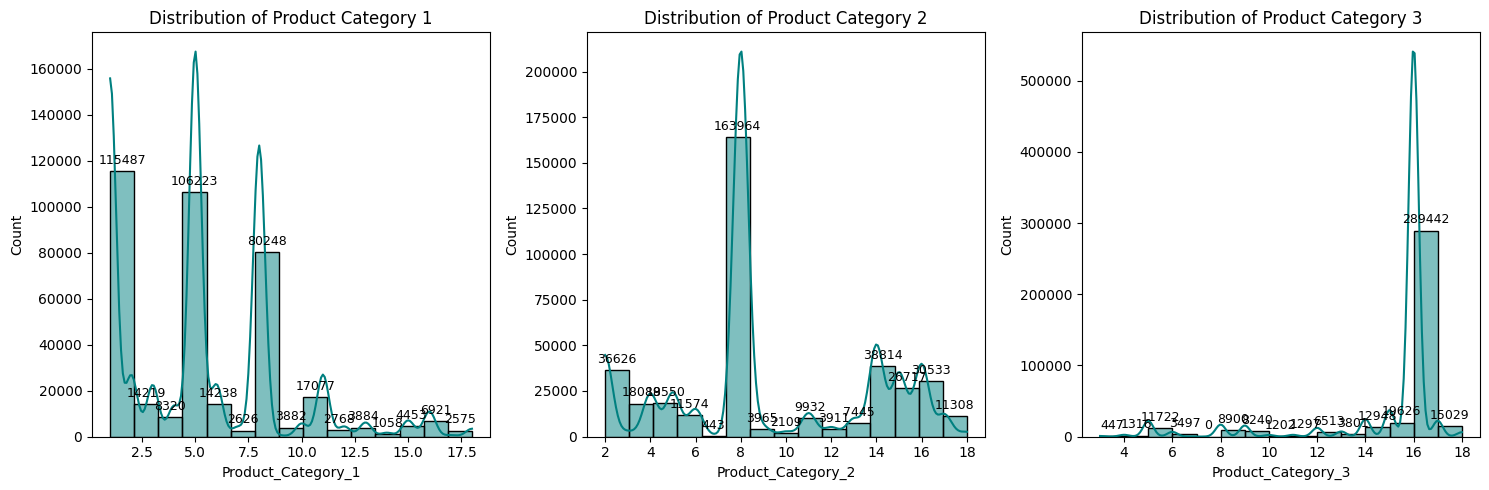

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
ax= sns.histplot(df["Product_Category_1"], bins=15, kde=True, color = "teal")

#Add Data Labels
for conatiner in ax.containers:
    ax.bar_label(conatiner, fmt="%.0f", fontsize=9, padding =3)
plt.title("Distribution of Product Category 1")

plt.subplot(1, 3, 2)
ax= sns.histplot(df["Product_Category_2"], bins=15, kde=True, color = "teal")

#Add Data Labels
for conatiner in ax.containers:
    ax.bar_label(conatiner, fmt="%.0f", fontsize=9, padding = 3)
plt.title("Distribution of Product Category 2")

plt.subplot(1, 3, 3)
ax= sns.histplot(df["Product_Category_3"], bins=15, kde=True, color = "teal")

#Add Data Labels
for conatiner in ax.containers:
    ax.bar_label(conatiner, fmt="%.0f", fontsize=9, padding = 3)
plt.title("Distribution of Product Category 3")

plt.tight_layout()
plt.show()

**🔍 Insights from the Distribution of Product Categories**

The histograms display the frequency distribution of purchases across different product categories. Here are some key observations:

1️⃣ Product Category 1:

The distribution is heavily right-skewed, meaning a few categories dominate the sales.

Categories 1, 5, and 8 have significantly higher purchases than the others.

There are many low-frequency categories, indicating a long-tail distribution.
<hr>
2️⃣ Product Category 2:

The peak is around category 8, which has the highest purchase count.

Other significant spikes can be seen around categories 4, 14, and 16.

The majority of categories have relatively low counts, suggesting selective purchasing behavior.
<hr>
3️⃣ Product Category 3:

The distribution is extremely skewed, with category 16 dominating purchases.

Other categories have very low purchases, suggesting they may not be as popular or frequently available.

The sharp spike around 16 suggests a possible bestseller or a product frequently purchased together with others.
<hr>

In [ ]:
#Using plotly Library to be able to see this data in a better way with hover options
import plotly.express as px
import plotly.subplots as sp

# Create subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=[
    "Distribution of Product Category 1",
    "Distribution of Product Category 2",
    "Distribution of Product Category 3"
])

# Product Category 1
hist1 = px.histogram(df, x="Product_Category_1", nbins=15)
for trace in hist1.data:
    fig.add_trace(trace, row=1, col=1)

# Product Category 2
hist2 = px.histogram(df, x="Product_Category_2", nbins=15)
for trace in hist2.data:
    fig.add_trace(trace, row=1, col=2)

# Product Category 3
hist3 = px.histogram(df, x="Product_Category_3", nbins=15)
for trace in hist3.data:
    fig.add_trace(trace, row=1, col=3)

# Update layout for interactivity
fig.update_layout(
    title_text="Distribution of Product Categories",
    showlegend=False,
    height=500,
    width=1200
)

# Show figure
fig.show()


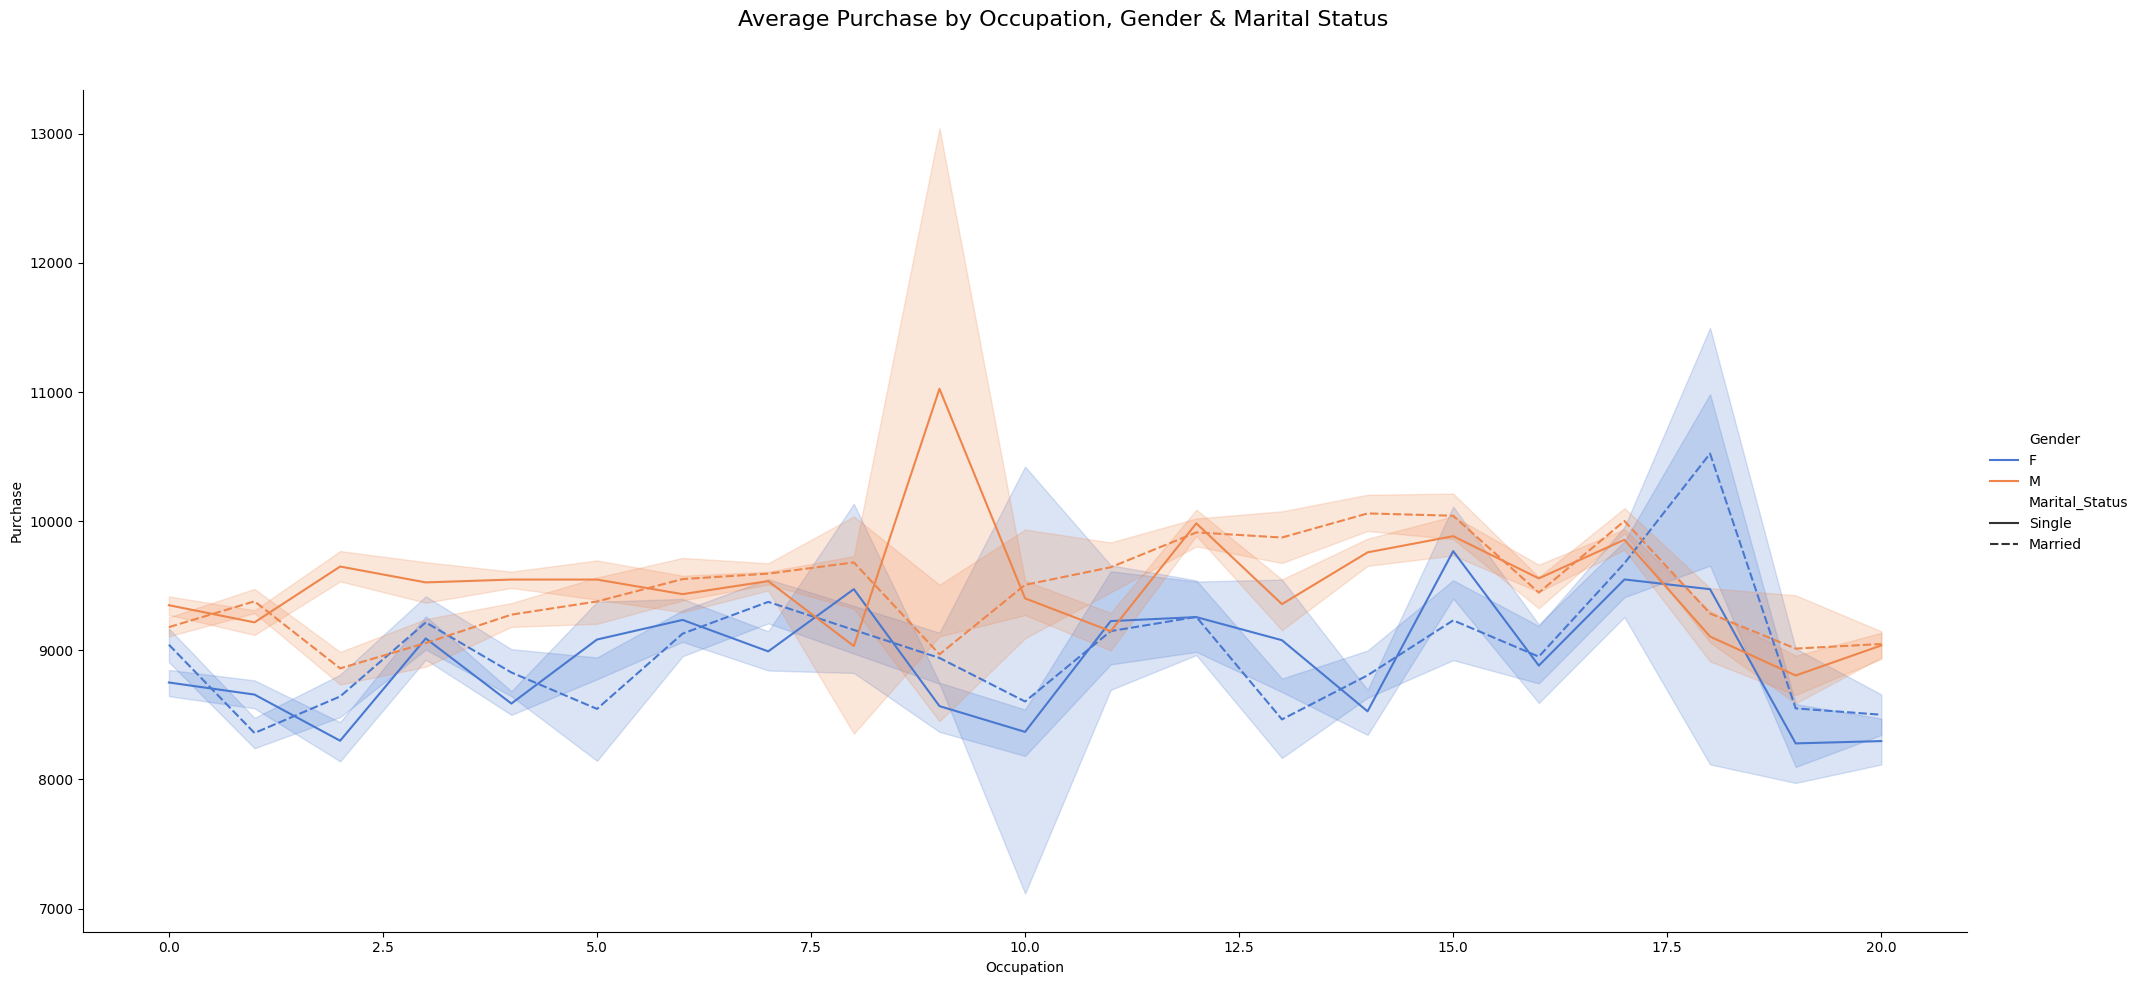

In [ ]:
# Create the plot
g = sns.relplot(x='Occupation', y='Purchase', kind='line', data=df,
                style="Marital_Status", hue='Gender', height=10, aspect=2)

# Set the title
g.fig.suptitle("Average Purchase by Occupation, Gender & Marital Status", fontsize=16)

# Adjust the layout to prevent title overlap
g.fig.subplots_adjust(top=0.9)

plt.show()


**📊 Key Observations:**

✅ Gender-Based Spending:

Males (orange) generally have higher average purchases than females (blue) across most occupations.

There is a significant spike in male spending for a particular occupation (around 9-10), suggesting that men in this job category spend considerably more.
<hr>
✅ Marital Status Influence:

The difference between single (solid line) and married (dashed line) individuals is not drastic.

In some occupations, married individuals (dashed lines) spend slightly more than single individuals, but the trend varies.
<hr>
✅ Occupation-Based Trends:

Occupation 9-10 has a massive peak, likely due to a high-income profession or specific spending habits.

Other occupations show relatively stable purchase behaviors, with fluctuations but no extreme outliers.
<hr>
✅ Spending Variability (Shaded Area):

The shaded area represents the confidence interval or variability in spending.

Large shaded regions indicate high variation in spending patterns, while narrow areas suggest consistent spending habits.

Occupations around 9-10 and 18-19 have significant spending variations, meaning individuals in these jobs have highly diverse purchasing behaviors.

<hr>